40
216


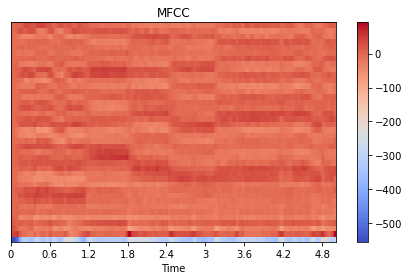

In [2]:
#%matplotlib 
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np 
audio_sample, sr = librosa.core.load('samples/violin.wav')
sr

mfccs = librosa.feature.mfcc(audio_sample ,sr=sr, n_mfcc = 40)
print(mfccs.shape[0])
print(mfccs.shape[1])
#print(x)


librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

40
216


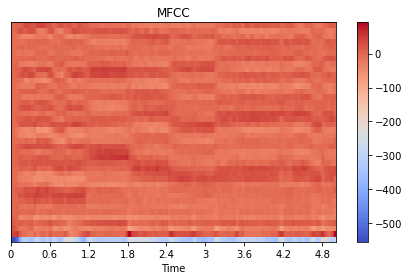

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np 
audio_sample, sr = librosa.core.load('samples/violin.wav')
sr

mfccs = librosa.feature.mfcc(audio_sample ,sr=sr, n_mfcc = 40)
print(mfccs.shape[0])
print(mfccs.shape[1])
#print(x)


librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

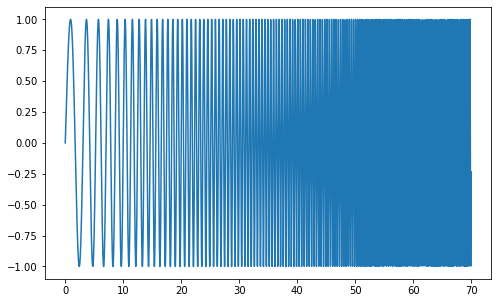

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# Seed the random number generator
np.random.seed(0)

time_step = .01
time_vec = np.arange(0, 70, time_step)

# A signal with a small frequency chirp
sig = np.sin(0.5 * np.pi * time_vec * (1 + .1 * time_vec))

plt.figure(figsize=(8, 5))
plt.plot(time_vec, sig)

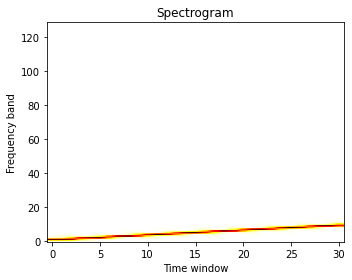

In [4]:
from scipy import signal
freqs, times, spectrogram = signal.spectrogram(sig)

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

In [4]:
freqs, psd = signal.welch(sig)

plt.figure(figsize=(8, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()

NameError: name 'sig' is not defined

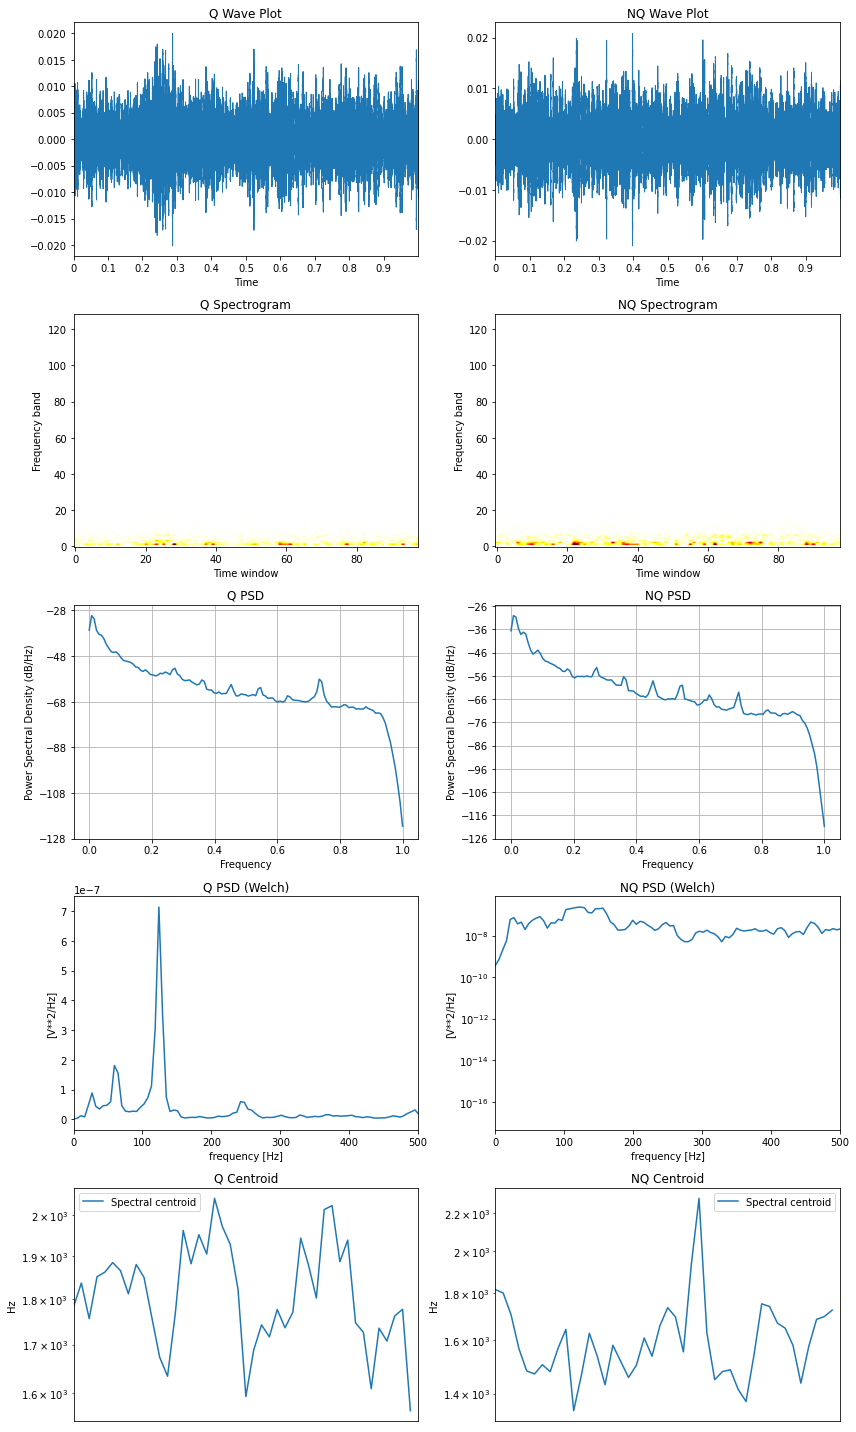

In [1]:
#============================================== IMPORTS =============================================
#===== Standard imports
import os
#import warnings                   # This block prevents display of harmless warnings, but should be
#warnings.filterwarnings("ignore") # commented out till the final version, to avoid missing "real" warnings 

#===== 3rd party imports
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy import signal
import numpy as np

#===== Repository imports
# None

#============================================ PARAMETERS ============================================
SAMPLE_RATE  = 22050

# Audio file full path 
QUEEN ="samples/H1_NOQUEEN_chunk0001.wav"
#NOQUEEN ="samples/H1_QUEEN_chunk0002.wav"
NOQUEEN ="samples/H1_QUEEN_chunk0002.wav"

ROWS=5

q, srq = librosa.load(QUEEN, sr = SAMPLE_RATE)
nq, srnq = librosa.load(NOQUEEN, sr = SAMPLE_RATE)

plt.figure(figsize=(12, 4*ROWS))

# Visualize signal
plt.subplot(ROWS, 2, 1)
librosa.display.waveplot(q, sr = srq, max_sr = srq)
plt.title('Q Wave Plot')

plt.subplot(ROWS, 2, 2)
librosa.display.waveplot(nq, sr = srnq, max_sr = srnq)
plt.title('NQ Wave Plot')


# Visualize spectrogram
from scipy import signal

plt.subplot(ROWS, 2, 3)
freqs, times, spectrogram = signal.spectrogram(q)
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Q Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')

plt.subplot(ROWS, 2, 4)
freqs, times, spectrogram = signal.spectrogram(nq)
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('NQ Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')

# Visualize Power Spectrum Density
plt.subplot(ROWS, 2, 5)
plt.psd(q)
plt.title('Q PSD')

plt.subplot(ROWS, 2, 6)
plt.psd(nq, detrend='mean')
plt.title('NQ PSD')



# Visualize spectrum (welch) and a moving average (as a special case of convolution)
N=25

f, Pxx_den = signal.welch(q, srq, nperseg=4096)
plt.subplot(ROWS, 2, 7)
plt.xlim([0, 500])
plt.plot(f, Pxx_den)
#plt.plot(np.convolve(f, np.ones((N,))/N, mode='same'), Pxx_den)

plt.xlabel('frequency [Hz]')
plt.ylabel('[V**2/Hz]')
plt.title('Q PSD (Welch)')

f, Pxx_den = signal.welch(nq, srnq, nperseg=4096)
plt.subplot(ROWS, 2, 8)
plt.xlim([0, 500])
plt.semilogy(f, Pxx_den)
#plt.plot(np.convolve(f, np.ones((N,))/N, mode='same'), Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('[V**2/Hz]')
plt.title('NQ PSD (Welch)')



# Spectral centroid
cent = librosa.feature.spectral_centroid(q, sr=srq)
plt.subplot(ROWS, 2, 9)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.legend()
plt.title('Q Centroid')

cent = librosa.feature.spectral_centroid(nq, sr=srnq)
plt.subplot(ROWS, 2, 10)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.legend()
plt.title('NQ Centroid')


plt.tight_layout()
plt.show()